In [2]:
import pandas as pd

# Cargar el Excel (única hoja)
df_grado = pd.read_excel(r"C:\Users\0021878\Downloads\test_grado_completo_con_scoring 5.xlsx")

# Vista rápida de las primeras filas
df_grado.head(5) # Juan: Si pones un df_grado.head(5) sólo te muestra algunos registros :)

,ACCOUNTID,ID,ID18__PC,target,desmatriculado,PL_CURSO_ACADEMICO,CH_NACIONAL,NU_NOTA_MEDIA_ADMISION,NU_NOTA_MEDIA_1_BACH__PC,CH_PRUEBAS_CALIFICADAS,...,CH_ANTIGUOALUMNO_INTERCAMBIO,CH_HIJO_ANTIGUO_ALUMNO__PC,PCA1,PCA2,cluster,interpretacion_cluster,etapa_compuesta,etapa_ordinal_num,prediction_label,prob_matricula_real
0,0016900002lidNPAAY,0066900001VRQMIAA5,0036900003B4fYGAAZ,0,0,2025/2026,False,NaN,NaN,False,...,False,False,-9.925818,34.478101,4,Perfil mixto / no dominante,Cerrada/Perdida__NA,NaN,0,0.0000
1,0016900002lidNPAAY,0066900001VRQMIAA5,0036900003B4fYGAAZ,0,0,2025/2026,False,NaN,NaN,False,...,False,False,-2.923296,2.295669,4,Perfil mixto / no dominante,Cerrada/Perdida__NA,NaN,0,0.0000
2,0016900002lidNPAAY,0066900001VRQMIAA5,0036900003B4fYGAAZ,0,0,2025/2026,False,NaN,NaN,False,...,False,False,-2.274656,-0.685373,4,Perfil mixto / no dominante,Cerrada/Perdida__NA,NaN,0,0.0014
3,0011r00002NftnMAAR,0066900001W0Y3GAAV,0031r00002gzdqcAAA,0,0,2025/2026,True,NaN,NaN,False,...,False,False,-2.323181,1.899729,4,Perfil mixto / no dominante,Matrícula Admisión__Inicio,NaN,0,0.0000
4,0011r00002NftnMAAR,0066900001W0Y3GAAV,0031r00002gzdqcAAA,0,0,2025/2026,True,NaN,NaN,False,...,False,False,-8.565469,30.588251,4,Perfil mixto / no dominante,Matrícula Admisión__Inicio,NaN,0,0.0400


In [8]:
df_grado.shape

(105965, 62)

## Variable Visita Campus

### Revisar que la variable Visita Campus está en el conjunto de datos.

In [4]:
# Comprobar si la columna existe
if "CH_VISITACAMPUS__PC" in df_grado.columns:
    print("✅ La columna 'CH_VISITACAMPUS__PC' está en el dataset.")
else:
    print("❌ La columna 'CH_VISITACAMPUS__PC' NO está en el dataset.")

print(df_grado["CH_VISITACAMPUS__PC"].head(10))


✅ La columna 'CH_VISITACAMPUS__PC' está en el dataset.
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: CH_VISITACAMPUS__PC, dtype: bool


### Analizar % de true y de false que tiene(por ID único).

CH_VISITACAMPUS__PC
False    82.127456
True     17.872544
Name: proportion, dtype: float64


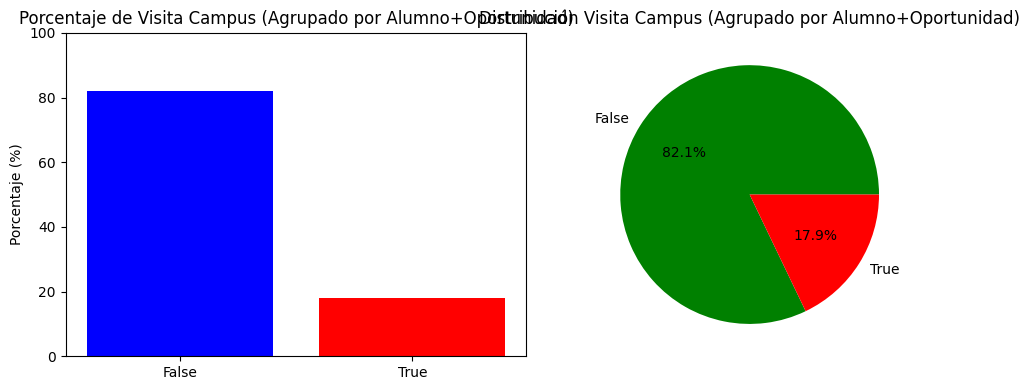

In [10]:
import matplotlib.pyplot as plt

# 1. Crear un identificador combinado
df_grado["ID_COMBINADO"] = df_grado["ID"].astype(str) + "_" + df_grado["ACCOUNTID"].astype(str)

# 2. Agrupar por ID_COMBINADO y calcular la probabilidad media
df_agrupado = (
    df_grado
    .groupby("ID_COMBINADO", as_index=False)
    .agg({
        "CH_VISITACAMPUS__PC": "first",  # asumimos que no cambia dentro de la combinación
        "prob_matricula_real": "mean"
    })
)

# 3. Calcular porcentajes sobre el conjunto agrupado
porcentaje_visita = df_agrupado["CH_VISITACAMPUS__PC"].value_counts(normalize=True) * 100
print(porcentaje_visita)

# 4. Gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Barras
axes[0].bar(porcentaje_visita.index.astype(str), porcentaje_visita.values, color=['blue', 'red'])
axes[0].set_title("Porcentaje de Visita Campus (Agrupado por Alumno+Oportunidad)")
axes[0].set_ylabel("Porcentaje (%)")
axes[0].set_ylim(0, 100)

# Pie chart
axes[1].pie(porcentaje_visita.values, labels=porcentaje_visita.index.astype(str),
            autopct='%1.1f%%', colors=['green', 'red'])
axes[1].set_title("Distribución Visita Campus (Agrupado por Alumno+Oportunidad)")

plt.tight_layout()
plt.show()


In [11]:
# Ver si hay alumnos con valores distintos en CH_VISITACAMPUS__PC
cambios = df_grado.groupby("ID")["CH_VISITACAMPUS__PC"].nunique()
print(cambios.value_counts())  # cuántos tienen 1 valor único y cuántos tienen más de 1


CH_VISITACAMPUS__PC
1    14609
Name: count, dtype: int64


#### Comparar medias de probabilidad

In [13]:
# Media de probabilidad en el dataset original (todas las filas)
media_original = df_grado["prob_matricula_real"].mean()

# Agrupar por Alumno+Oportunidad y calcular la probabilidad media
df_agrupado = (
    df_grado
    .groupby(["ID", "ACCOUNTID"], as_index=False)
    .agg({
        "CH_VISITACAMPUS__PC": "first",
        "prob_matricula_real": "mean"
    })
)

# Media de probabilidad en el dataset agrupado
media_agrupada = df_agrupado["prob_matricula_real"].mean()

print(f"📊 Media original: {media_original:.4f}")
print(f"📊 Media agrupada por Alumno+Oportunidad: {media_agrupada:.4f}")
print(f"🔍 Diferencia: {media_agrupada - media_original:.4f}")


📊 Media original: 0.4397
📊 Media agrupada por Alumno+Oportunidad: 0.2388
🔍 Diferencia: -0.2009


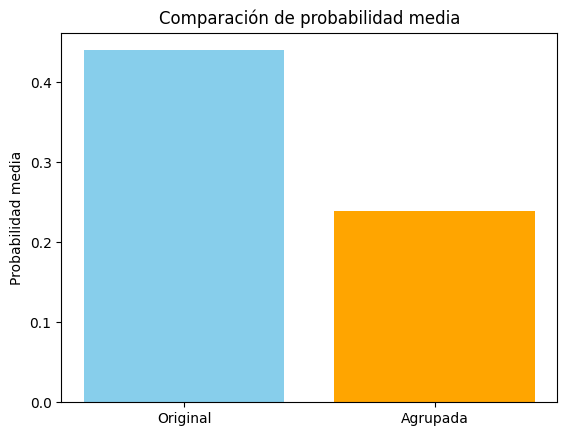

In [14]:
import matplotlib.pyplot as plt

plt.bar(["Original", "Agrupada"], [media_original, media_agrupada], color=["skyblue", "orange"])
plt.ylabel("Probabilidad media")
plt.title("Comparación de probabilidad media")
plt.show()


### Análisis de las probabilidades para los que visitan y los que no

                       count      mean       std  min  25%     50%       75%  \
CH_VISITACAMPUS__PC                                                            
False                11998.0  0.223526  0.369671  0.0  0.0  0.0014  0.326900   
True                  2611.0  0.308821  0.398429  0.0  0.0  0.0120  0.766991   

                     max  
CH_VISITACAMPUS__PC       
False                1.0  
True                 1.0  


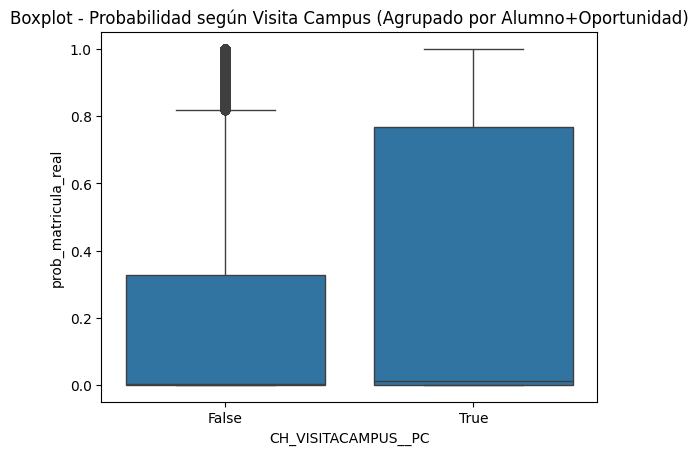

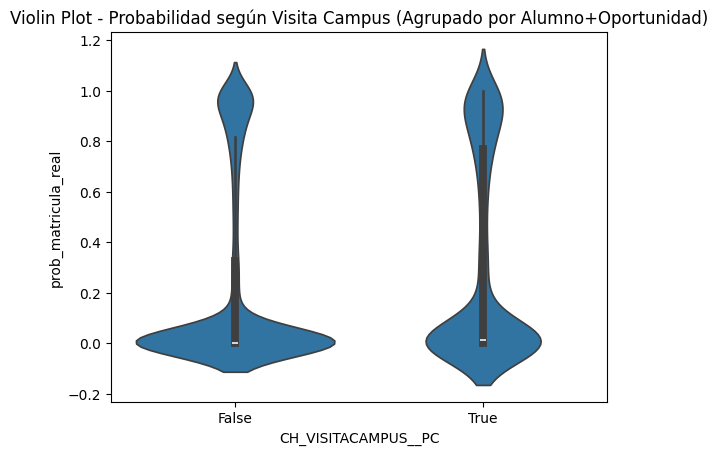

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por Alumno+Oportunidad y calcular la probabilidad media
df_agrupado = (
    df_grado
    .groupby(["ID", "ACCOUNTID"], as_index=False)
    .agg({
        "CH_VISITACAMPUS__PC": "first",   # asumimos que no cambia dentro de la combinación
        "prob_matricula_real": "mean"     # media de probabilidad por combinación
    })
)

# Estadísticas por grupo
stats_visita = df_agrupado.groupby("CH_VISITACAMPUS__PC")["prob_matricula_real"].describe()
print(stats_visita)

# Boxplot
sns.boxplot(x="CH_VISITACAMPUS__PC", y="prob_matricula_real", data=df_agrupado)
plt.title("Boxplot - Probabilidad según Visita Campus (Agrupado por Alumno+Oportunidad)")
plt.show()

# Violin plot
sns.violinplot(x="CH_VISITACAMPUS__PC", y="prob_matricula_real", data=df_agrupado)
plt.title("Violin Plot - Probabilidad según Visita Campus (Agrupado por Alumno+Oportunidad)")
plt.show()


## Carga de los datos: test_master_completo_con_scoring 6

In [17]:
import pandas as pd

# Cargar el Excel (única hoja)
df_master = pd.read_excel(r"C:\Users\0021878\Downloads\test_master_completo_con_scoring 6.xlsx")

# Vista rápida de las primeras filas
df_master.head(10)

,ACCOUNTID,ID,ID18__PC,target,desmatriculado,PL_CURSO_ACADEMICO,CH_NACIONAL,NU_NOTA_MEDIA_ADMISION,NU_NOTA_MEDIA_1_BACH__PC,CH_PRUEBAS_CALIFICADAS,...,CH_ANTIGUO_ALUMNO__PC,CH_ALUMNI__PC,CH_ANTIGUOALUMNO_INTERCAMBIO,CH_HIJO_ANTIGUO_ALUMNO__PC,PCA1,PCA2,cluster,interpretacion_cluster,prediction_label,prob_matricula_real
0,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-5.463977,18.799213,4,Perfil mixto / no dominante,1,0.9982
1,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-1.021142,-1.619322,4,Perfil mixto / no dominante,1,0.9985
2,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.986269,-1.779593,4,Perfil mixto / no dominante,1,0.9985
3,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9985
4,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9985
5,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9985
6,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-1.600036,1.041178,4,Perfil mixto / no dominante,1,0.9982
7,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9985
8,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9985
9,0016900002xr7hUAAQ,0066900001dGFfXAAW,0036900003SgRpdAAF,1,0,2025/2026,True,NaN,NaN,False,...,False,False,False,False,-0.965345,-1.875756,4,Perfil mixto / no dominante,1,0.9985


In [18]:
df_master.shape

(3681, 60)

### Porcentaje de true y de false(con IDs únicos también)

CH_ANTIGUO_ALUMNO__PC
False    89.315526
True     10.684474
Name: proportion, dtype: float64


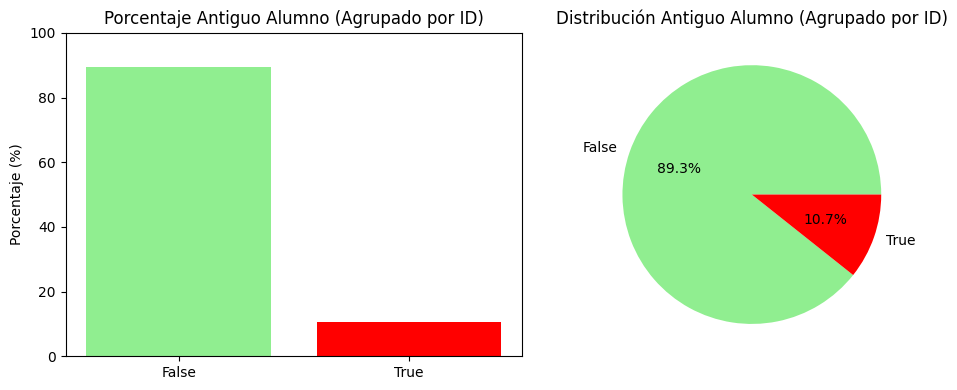

In [23]:
import matplotlib.pyplot as plt

# 1. Agrupar por ID y calcular la probabilidad media para cada alumno
df_master_agrupado = (
    df_master
    .groupby("ID", as_index=False)
    .agg({
        "CH_ANTIGUO_ALUMNO__PC": "first",   # asumimos que no cambia por alumno
        "prob_matricula_real": "mean"       # media de probabilidad por alumno
    })
)

# 2. Calcular porcentajes sobre el conjunto agrupado
porcentaje_antiguo = df_master_agrupado["CH_ANTIGUO_ALUMNO__PC"].value_counts(normalize=True) * 100
print(porcentaje_antiguo)

# 3. Gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Barras
axes[0].bar(porcentaje_antiguo.index.astype(str), porcentaje_antiguo.values, color=['lightgreen', 'red'])
axes[0].set_title("Porcentaje Antiguo Alumno (Agrupado por ID)")
axes[0].set_ylabel("Porcentaje (%)")
axes[0].set_ylim(0, 100)

# Pie chart
axes[1].pie(porcentaje_antiguo.values, labels=porcentaje_antiguo.index.astype(str),
            autopct='%1.1f%%', colors=['lightgreen', 'red'])
axes[1].set_title("Distribución Antiguo Alumno (Agrupado por ID)")

plt.tight_layout()
plt.show()
